## Imports de utilidad


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yaml
from src.Metrics.metrics_utils import get_hist_from_str, plot_10,evaluate_all_features,plot_histogram,similarity_metric, query_image, evaluate_query
from src.SIFT.SIFT_gen_and_utils import SIFTFeatures
from tqdm import notebook
from PIL import Image
config = yaml.load(open('/root/labint/LabInt/LabInt/config/full_images_to_hist_config.yaml', 'r'), Loader=yaml.FullLoader)
n_bins = config['clusterization_config']['n_clusters']

In [2]:
df = pd.read_csv('/root/labint/LabInt/LabInt/csv/total_histogram_CNN.csv')
SIFT = SIFTFeatures("", "", run=False)
# get all images from the same class
df["class"] = df["image_name"].apply(lambda x: SIFT.get_class(x))
df["features_histogram"] = df["features_histogram"].apply(lambda x: get_hist_from_str(x, separator=' '))

df.head()

image_name  \
0                         0_430b273cb7915d83.jpg   
1                         0_8c54ccf63a12ee74.jpg   
2                         0_c8f198d7da690cc8.jpg   
3                                     100001.jpg   
4  1000_nm1265067_rm1814797056_1975-7-6_2006.jpg   

                                  features_histogram  \
0  [0.00891516, 0.01386802, 0.00924535, 0.0089151...   
1  [0.01114108, 0.00788027, 0.00652161, 0.0067933...   
2  [0.00954264, 0.0126586, 0.0085689, 0.00837415,...   
3  [0.00292408, 0.00988136, 0.0033274, 0.00846974...   
4  [0.0123984, 0.0, 0.0247968, 0.0, 0.0, 0.004132...   

                                        features_CNN       class  
0  [0.029053612, 0.005296911, 0.04431615, 8.36852...     0_type1  
1  [0.02466255, 0.000653582, 0.028425196, 0.00015...     0_type1  
2  [0.026438147, 0.0029341085, 0.03634543, -0.002...     0_type1  
3  [0.029428592, 0.00525929, 0.044686396, 0.00075...     0_type2  
4  [0.011611224, 0.007402856, 0.045435827, -0.002...  1000_type1

## Método Handcrafted


In [4]:
df.head()

image_name  \
0                         0_430b273cb7915d83.jpg   
1                         0_8c54ccf63a12ee74.jpg   
2                         0_c8f198d7da690cc8.jpg   
3                                     100001.jpg   
4  1000_nm1265067_rm1814797056_1975-7-6_2006.jpg   

                                  features_histogram  \
0  [0.00891516, 0.01386802, 0.00924535, 0.0089151...   
1  [0.01114108, 0.00788027, 0.00652161, 0.0067933...   
2  [0.00954264, 0.0126586, 0.0085689, 0.00837415,...   
3  [0.00292408, 0.00988136, 0.0033274, 0.00846974...   
4  [0.0123984, 0.0, 0.0247968, 0.0, 0.0, 0.004132...   

                                        features_CNN       class  
0  [0.029053612, 0.005296911, 0.04431615, 8.36852...     0_type1  
1  [0.02466255, 0.000653582, 0.028425196, 0.00015...     0_type1  
2  [0.026438147, 0.0029341085, 0.03634543, -0.002...     0_type1  
3  [0.029428592, 0.00525929, 0.044686396, 0.00075...     0_type2  
4  [0.011611224, 0.007402856, 0.045435827, -0.002...  1000_type1

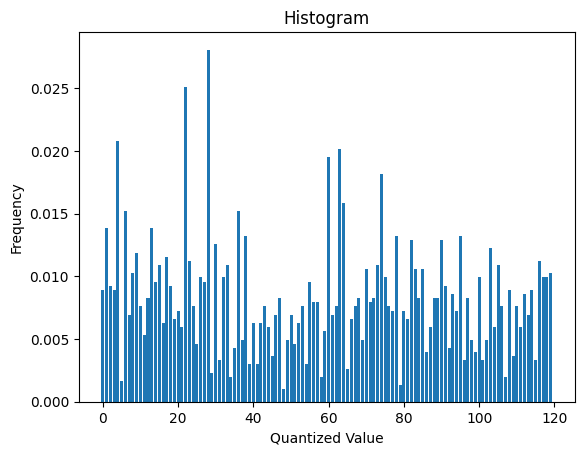

In [5]:
plot_histogram(df, 0, 120,feature_type="histogram")

In [1]:
image_example = df["image_name"][1000]

df_query_hand = query_image(df, IMAGE_EXAMPLE, measure=MEASURE, feature_type = "histogram")
df_query_hand.head()

NameError: name 'df' is not defined

In [7]:
df['features_histogram'][1000].shape

(120,)

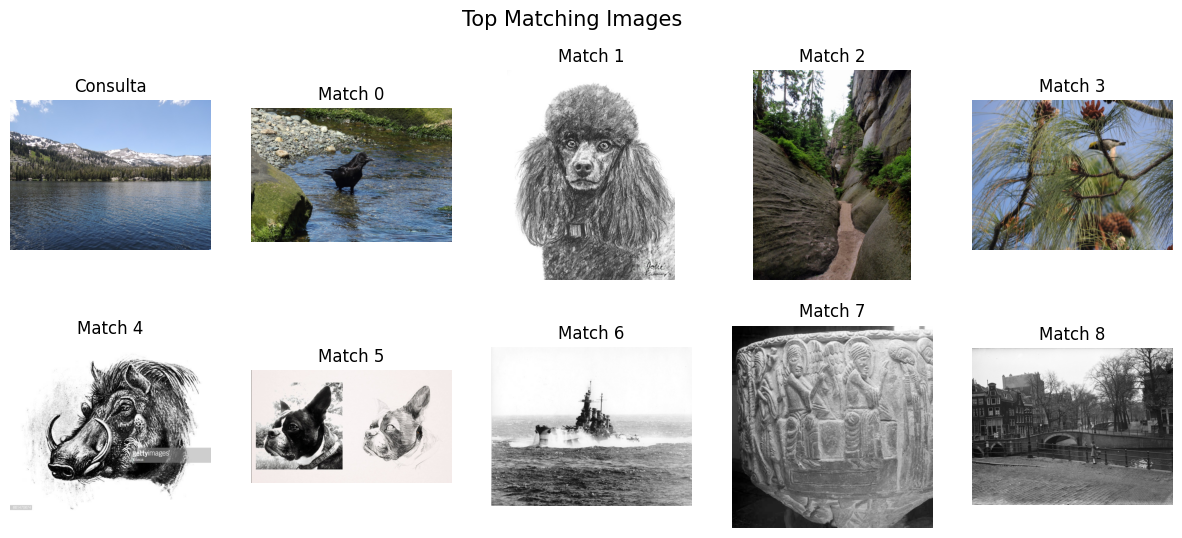

In [8]:
def plot_10(df_, path_to_images):
    fig,ax = plt.subplots(nrows=2,ncols=5,figsize=(15, 6))
    fig.suptitle("Top Matching Images", fontsize=15)
    ax[0][0].set_title(f"Consulta")
    x = 0
    for j in range(0, 2):
        for i in range(0,5): 
            ax[j][i].set_axis_off()
            ax[j][i].imshow(Image.open(f'{path_to_images}/{df_["image_name"][x]}'))
            if x > 0:
                ax[j][i].set_title(f"Match {x-1}")
            x +=1
    plt.show()

path_to_images = '/root/labint/LabInt/LabInt/data/GPR1200/images'
plot_10(df_query_hand,path_to_images)

In [9]:
# count how many different classes are
df["class"].nunique()

1700

In [10]:
# evaluating ranking method
image_example = df["image_name"][0]
evaluate_query(df, IMAGE_EXAMPLE, measure=MEASURE, normalized=True)


0_type1
[0, 105, 316, 369, 518, 866, 1032, 1274, 2055, 2829]


0.07675075564779812

## Método por Redes Convolucionales

In [11]:

import tqdm

import os
from PIL import Image

def launch_CNN(df):
    from src.CNN.CNN_utils import  CNN_method, deep_rank_model
    model = deep_rank_model()
    model.load_weights(input())

    def load_single(path):
        image = Image.open(os.path.join(path))
        return image

    CNN_method(load_single(f'/root/labint/LabInt/LabInt/data/GPR1200/images{df["image_name"][0]}'), model)

    def apply_cnn(image, CNN_method):
        try:
            return CNN_method(image, model)
        except:
            return np.zeros(4096)

    df["features_CNN"] = tqdm.tqdm(df["image_name"].apply(lambda x: apply_cnn(load_single(f'/root/labint/scripts/LabInt/data/GPR1200/images/{x}'), CNN_method), model))
    df.to_csv('../dataset/total_quant_histogram_cnn_features.csv', index=False)
 

In [12]:
gg = get_hist_from_str(df['features_CNN'][0], separator = ',')
gg.shape

(4096,)

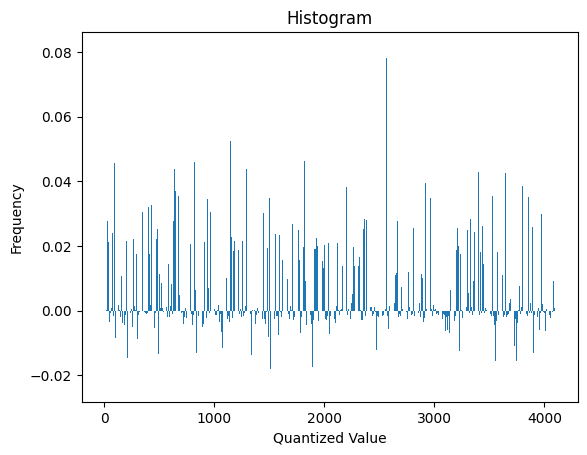

In [13]:
plot_histogram(df,0,n_bins=4096, feature_type='CNN')

In [14]:
#convert each row to numpyy array 
from tqdm import notebook
for index,row in notebook.tqdm(df.iterrows()):
    df.at[index, 'features_CNN'] = get_hist_from_str(df.at[index, 'features_CNN'], separator=',')

0it [00:00, ?it/s]

In [15]:
print(df['features_CNN'][0])
print(type(df['features_CNN'][0]))

[ 0.02905361  0.00529691  0.04431615 ...  0.03970027 -0.00438279
  0.00016648]
<class 'numpy.ndarray'>


In [16]:
image_example = df["image_name"][0]
df_query_CNN = query_image(df,IMAGE_EXAMPLE, measure=MEASURE, feature_type = "CNN")
df_query_CNN.head()

image_name                                 features_histogram  \
0  0_430b273cb7915d83.jpg  [0.00891516, 0.01386802, 0.00924535, 0.0089151...   
1              128400.jpg  [0.00867227, 0.01663866, 0.00373109, 0.0110924...   
2              134300.jpg  [0.00897479, 0.01068908, 0.00635294, 0.0083697...   
3              113300.jpg  [0.00369548, 0.00854579, 0.00485031, 0.0064670...   
4              107700.jpg  [0.00660526, 0.00220175, 0.00660526, 0.0066052...   

                                        features_CNN      class    similarity  
0  [0.029053612, 0.005296911, 0.04431615, 8.36852...    0_type1 -1.192093e-07  
1  [0.026536468, 0.006892562, 0.042116687, 0.0011...  284_type2  4.449189e-03  
2  [0.02729461, 0.0052069454, 0.042228706, 0.0006...  343_type2  4.766345e-03  
3  [0.026739892, 0.0052878833, 0.041170012, -0.00...  133_type2  5.301118e-03  
4  [0.028466465, 0.0054746494, 0.04325634, -0.002...   77_type2  6.046534e-03

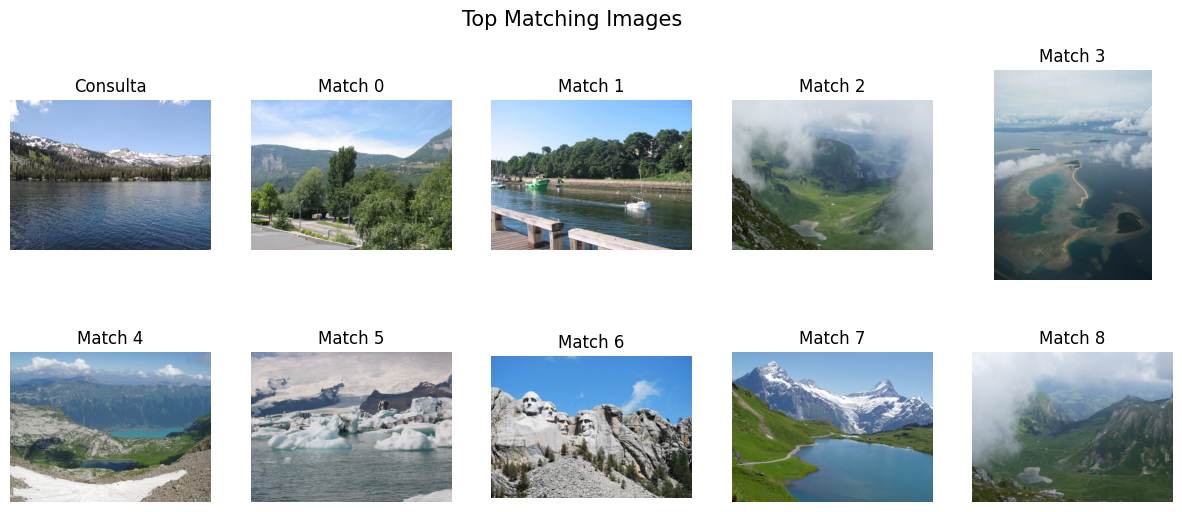

In [17]:
plot_10(df_query_CNN,path_to_images)

In [18]:
evaluate_query(df, IMAGE_EXAMPLE, measure=MEASURE, normalized=True,feature_type = "CNN")

0_type1
[0, 428, 575, 657, 1248, 1492, 1797, 2241, 2396, 4500]


0.12591933717128292

## Fusión de Ranking

In [19]:
#concat process
print(df.shape)
save = pd.DataFrame(np.concatenate([df['features_CNN'][0], df['features_histogram'][0]]))

df['features_fusion'] = [np.concatenate([df['features_CNN'][x], df['features_histogram'][x]]) for x in range(df.shape[0])]

lda_df = np.array([df['features_fusion'][x] for x in range(0,df.shape[0])])
print(lda_df.shape)

(13491, 5)
(13491, 4216)


In [20]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
X_train = lda_df

y_train =label_encoder.fit_transform(df['class'])
#print(X_train)
#print(y_train)
print(X_train.shape)
print(y_train.shape)#

print(X_train[0].shape)
#print(y_train[0])

(13491, 4216)
(13491,)
(4216,)


In [21]:
# Instantiate the LinearDiscriminantAnalysis model
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis()

# Fit the model to the training data
lda.fit(X_train, y_train)


LinearDiscriminantAnalysis()

In [22]:
X_train_lda = lda.transform(X_train) 

In [23]:
print(X_train_lda.shape)

(13491, 1698)


In [24]:
df['features_fusion'] =   [np.array(X_train_lda[i]) for i in range(X_train_lda.shape[0])]

In [25]:
df.head()

image_name  \
0                         0_430b273cb7915d83.jpg   
1                         0_8c54ccf63a12ee74.jpg   
2                         0_c8f198d7da690cc8.jpg   
3                                     100001.jpg   
4  1000_nm1265067_rm1814797056_1975-7-6_2006.jpg   

                                  features_histogram  \
0  [0.00891516, 0.01386802, 0.00924535, 0.0089151...   
1  [0.01114108, 0.00788027, 0.00652161, 0.0067933...   
2  [0.00954264, 0.0126586, 0.0085689, 0.00837415,...   
3  [0.00292408, 0.00988136, 0.0033274, 0.00846974...   
4  [0.0123984, 0.0, 0.0247968, 0.0, 0.0, 0.004132...   

                                        features_CNN       class  \
0  [0.029053612, 0.005296911, 0.04431615, 8.36852...     0_type1   
1  [0.02466255, 0.000653582, 0.028425196, 0.00015...     0_type1   
2  [0.026438147, 0.0029341085, 0.03634543, -0.002...     0_type1   
3  [0.029428592, 0.00525929, 0.044686396, 0.00075...     0_type2   
4  [0.011611224, 0.007402856, 0.045435827, -0.002...  1000_type1   

     similarity                                    features_fusion  
0 -1.192093e-07  [-2.613821145742236, 2.587963542480173, -0.439...  
1  1.660900e-01  [-2.5640103286492733, 4.1776568101211105, -0.2...  
2  4.163867e-02  [-3.9845652390666073, 3.9972214919772657, 0.33...  
3  4.710650e-02  [-2.384346915456419, 8.250267666349039, -5.056...  
4  6.470263e-01  [1.1109833935081854, -3.3930054641721537, -0.5...

In [26]:
#save preprocess
df['features_CNN'] = str([df['features_CNN'][i] for i in range(df.shape[0])])
#df.drop(columns=['similarity'])
df['features_CNN']

0        [array([ 0.02905361,  0.00529691,  0.04431615,...
1        [array([ 0.02905361,  0.00529691,  0.04431615,...
2        [array([ 0.02905361,  0.00529691,  0.04431615,...
3        [array([ 0.02905361,  0.00529691,  0.04431615,...
4        [array([ 0.02905361,  0.00529691,  0.04431615,...
                               ...                        
13486    [array([ 0.02905361,  0.00529691,  0.04431615,...
13487    [array([ 0.02905361,  0.00529691,  0.04431615,...
13488    [array([ 0.02905361,  0.00529691,  0.04431615,...
13489    [array([ 0.02905361,  0.00529691,  0.04431615,...
13490    [array([ 0.02905361,  0.00529691,  0.04431615,...
Name: features_CNN, Length: 13491, dtype: object

In [28]:
#df.to_csv('final_histograms.csv', index=False)

In [29]:
print(df['features_fusion'][0].shape)

(1698,)


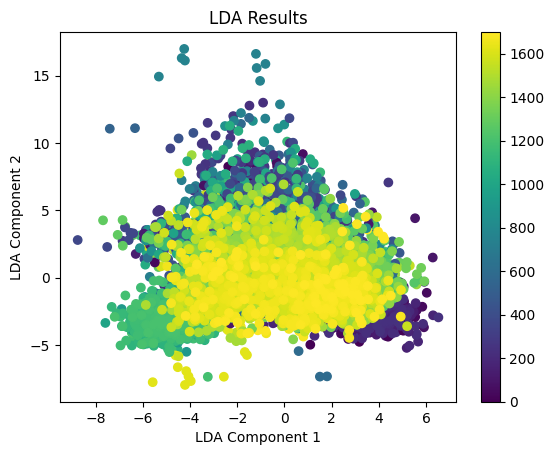

In [31]:
import matplotlib.pyplot as plt

# Create a 2D scatter plot
plt.scatter(X_train_lda[:, 0], X_train_lda[:, 1], c=y_train)
plt.xlabel('LDA Component 1')
plt.ylabel('LDA Component 2')
plt.title('LDA Results')
plt.colorbar()
plt.show()

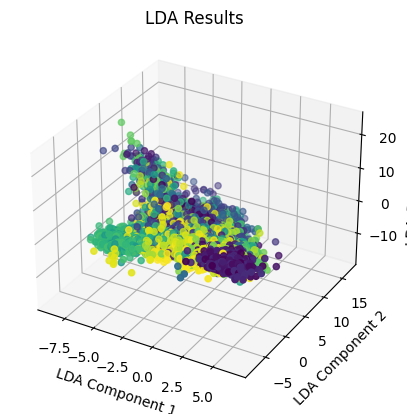

In [32]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D scatter plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_lda[:, 0], X_train_lda[:, 1], X_train_lda[:, 2], c=y_train)
ax.set_xlabel('LDA Component 1')
ax.set_ylabel('LDA Component 2')
ax.set_zlabel('LDA Component 3')
plt.title('LDA Results')
plt.show()

In [33]:
df['features_fusion'][0].shape

(1698,)

In [34]:
df.head()

image_name  \
0                         0_430b273cb7915d83.jpg   
1                         0_8c54ccf63a12ee74.jpg   
2                         0_c8f198d7da690cc8.jpg   
3                                     100001.jpg   
4  1000_nm1265067_rm1814797056_1975-7-6_2006.jpg   

                                  features_histogram  \
0  [0.00891516, 0.01386802, 0.00924535, 0.0089151...   
1  [0.01114108, 0.00788027, 0.00652161, 0.0067933...   
2  [0.00954264, 0.0126586, 0.0085689, 0.00837415,...   
3  [0.00292408, 0.00988136, 0.0033274, 0.00846974...   
4  [0.0123984, 0.0, 0.0247968, 0.0, 0.0, 0.004132...   

                                        features_CNN       class  \
0  [array([ 0.02905361,  0.00529691,  0.04431615,...     0_type1   
1  [array([ 0.02905361,  0.00529691,  0.04431615,...     0_type1   
2  [array([ 0.02905361,  0.00529691,  0.04431615,...     0_type1   
3  [array([ 0.02905361,  0.00529691,  0.04431615,...     0_type2   
4  [array([ 0.02905361,  0.00529691,  0.04431615,...  1000_type1   

     similarity                                    features_fusion  
0 -1.192093e-07  [-2.613821145742236, 2.587963542480173, -0.439...  
1  1.660900e-01  [-2.5640103286492733, 4.1776568101211105, -0.2...  
2  4.163867e-02  [-3.9845652390666073, 3.9972214919772657, 0.33...  
3  4.710650e-02  [-2.384346915456419, 8.250267666349039, -5.056...  
4  6.470263e-01  [1.1109833935081854, -3.3930054641721537, -0.5...

In [35]:
df_fusion_query = query_image(df, IMAGE_EXAMPLE, measure=MEASURE, feature_type = "fusion")

In [36]:
df_fusion_query.head()

image_name                                 features_histogram  \
0  0_430b273cb7915d83.jpg  [0.00891516, 0.01386802, 0.00924535, 0.0089151...   
1  0_8684223b404f7e47.jpg  [0.00448179, 0.00497977, 0.0129474, 0.01045752...   
2  0_ff075584fa3ac3fe.jpg  [0.01184547, 0.01261466, 0.0078457, 0.0115378,...   
3  0_b904d301c9f168df.jpg  [0.01156273, 0.01222981, 0.00956149, 0.0084496...   
4  0_618577ba46bc3d04.jpg  [0.00902748, 0.01086642, 0.00919466, 0.0101977...   

                                        features_CNN    class    similarity  \
0  [array([ 0.02905361,  0.00529691,  0.04431615,...  0_type1  1.110223e-16   
1  [array([ 0.02905361,  0.00529691,  0.04431615,...  0_type1  8.188173e-01   
2  [array([ 0.02905361,  0.00529691,  0.04431615,...  0_type1  8.361262e-01   
3  [array([ 0.02905361,  0.00529691,  0.04431615,...  0_type1  8.598941e-01   
4  [array([ 0.02905361,  0.00529691,  0.04431615,...  0_type1  8.642501e-01   

                                     features_fusion  
0  [-2.613821145742236, 2.587963542480173, -0.439...  
1  [-3.006215685289725, 3.372469705192569, -1.783...  
2  [-3.3161493896842664, 4.448872519802414, -1.59...  
3  [-2.5008284445195375, 4.5798867534498395, 1.02...  
4  [-3.4441016090789867, 3.9837581177537325, -0.4...

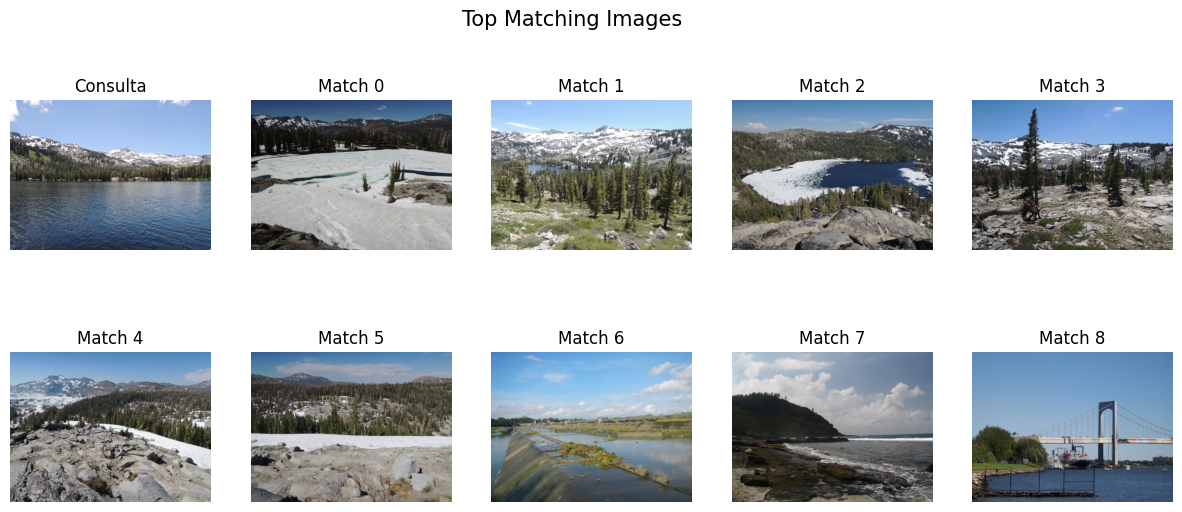

In [38]:
path_to_images = '/root/labint/LabInt/LabInt/data/GPR1200/images'
plot_10(df_fusion_query,path_to_images)

In [39]:
evaluate_query(df_fusion_query, image_example, measure=MEASURE, normalized=True,feature_type= "fusion")

0_type1
[0, 1, 2, 3, 4, 5, 6, 13, 26, 137]


0.0012518633821724772

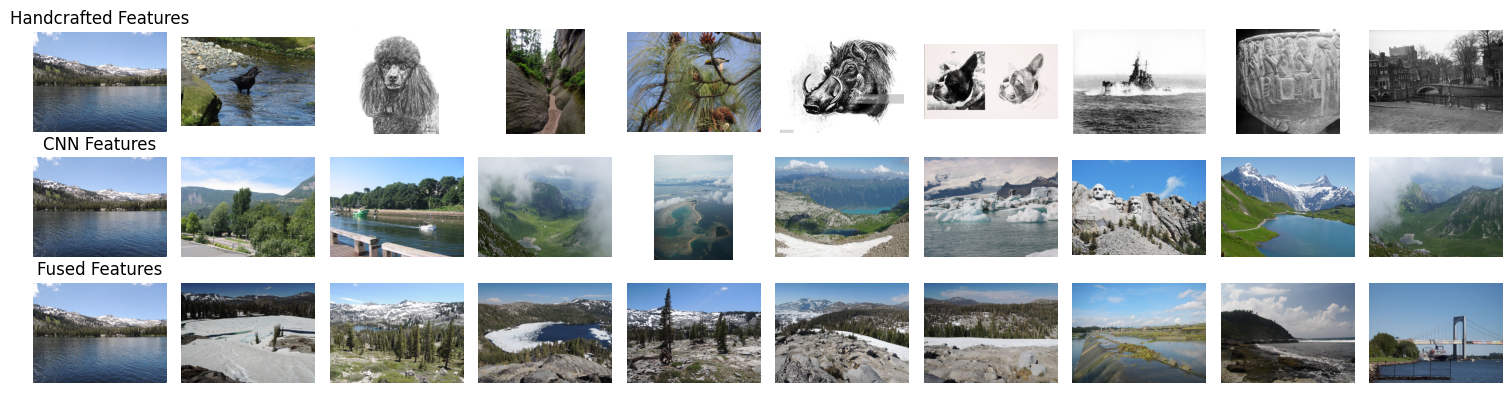

In [76]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
path_to_images = '/root/labint/LabInt/LabInt/data/GPR1200/images'
 
# Create a figure with three rows and ten columns
fig, axes = plt.subplots(nrows=3, ncols=10, figsize=(15, 4))

# Iterate over each row and column to plot the images
for i in range(3):
    for j in range(10):
        if i == 0:
            axes[i, j].imshow(Image.open(f'{path_to_images}/{df_query_hand["image_name"][j]}'))
        elif i == 1:
            axes[i, j].imshow(Image.open(f'{path_to_images}/{df_query_CNN["image_name"][j]}'))
        else:
            axes[i, j].imshow(Image.open(f'{path_to_images}/{df_fusion_query["image_name"][j]}'))
        axes[i, j].axis('off')

# Set the title for each row
axes[0, 0].set_title('Handcrafted Features')
axes[1, 0].set_title('CNN Features')
axes[2, 0].set_title('Fused Features')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

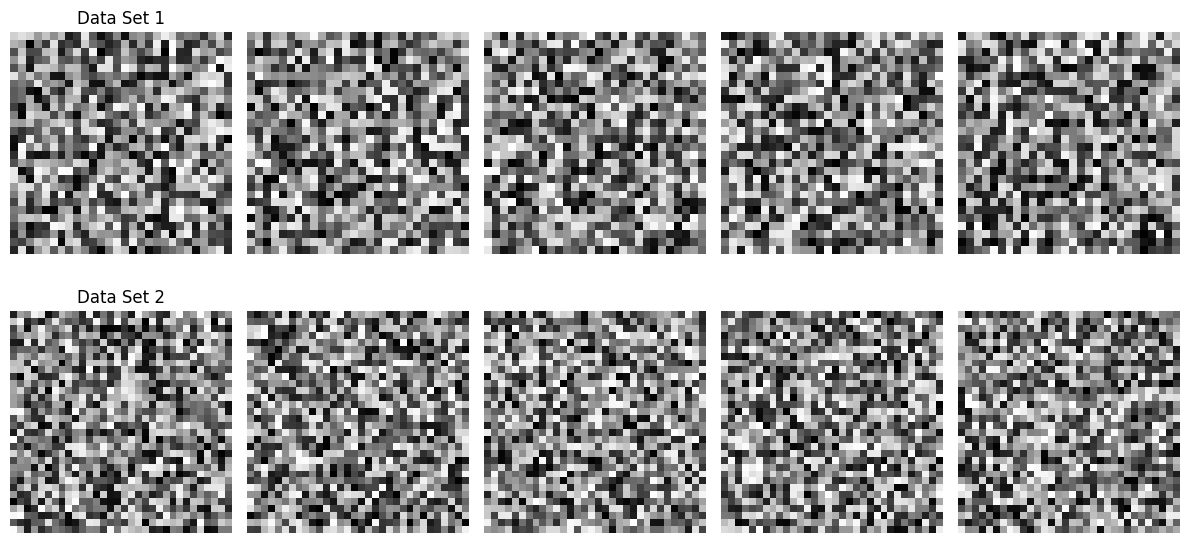

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Generate some example data
data_set1 = np.random.rand(10, 28, 28)  # 10 images of size 28x28
data_set2 = np.random.rand(10, 32, 32)  # 10 images of size 32x32
data_set3 = np.random.rand(10, 24, 24)  # 10 images of size 24x24

# Create a figure with two rows and five columns
fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(12, 6))

# Iterate over each row and column to plot the images
for i in range(2):
    for j in range(5):
        if i == 0:
            axes[i, j].imshow(data_set1[(i * 5) + j], cmap='gray')
        elif i == 1:
            axes[i, j].imshow(data_set2[(i * 5) + j], cmap='gray')
        else:
            axes[i, j].imshow(data_set3[(i * 5) + j], cmap='gray')
        axes[i, j].axis('off')

# Set the title for each row
axes[0, 0].set_title('Data Set 1')
axes[1, 0].set_title('Data Set 2')

# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



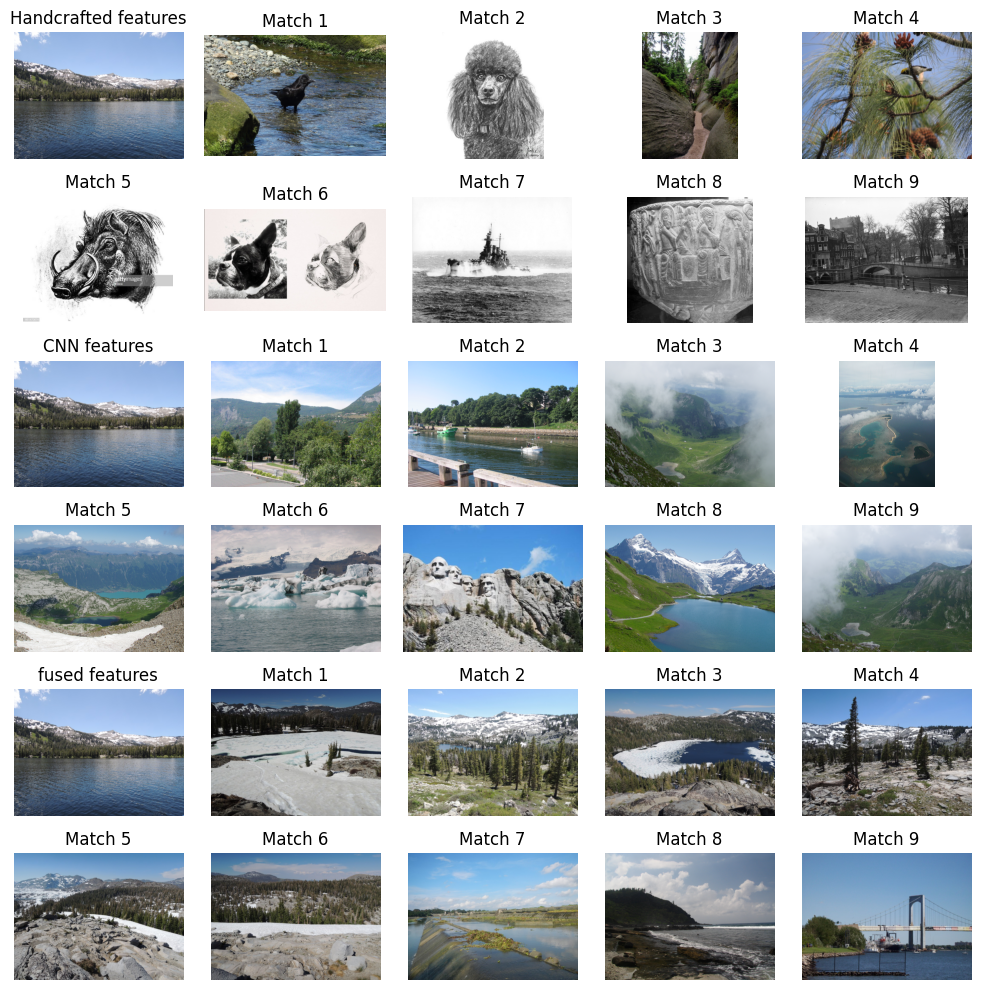

In [69]:
import matplotlib.pyplot as plt
import numpy as np
path_to_images = '/root/labint/LabInt/LabInt/data/GPR1200/images'

# Generate some example data
data = np.random.rand(30, 28, 28)  # 30 images of size 28x28

# Create a figure with five rows and six columns
fig, axes = plt.subplots(nrows=6, ncols=5, figsize=(10,10))

queries = [df_query_hand["image_name"],df_query_CNN["image_name"],df_fusion_query["image_name"]]
# Iterate over each row and column to plot the images
img_i = 0
for i in range(6):
    for j in range(5):
            axes[i, j].imshow(Image.open(f'{path_to_images}/{queries[0][img_i]}'))
            axes[i, j].axis('off')
            axes[i,j].set_title(f"Match {img_i}")
            img_i +=1
            if img_i > 9:
                img_i = 0
                queries.pop(0)
                

# Set the title for each row
axes[0, 0].set_title('Handcrafted features')
axes[2, 0].set_title('CNN features')
axes[4, 0].set_title('fused features')
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()
